In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
df = pd.read_csv(r"C:\Users\91626\OneDrive\Desktop\Assignments\clustering\EastWestAirlines.csv")

In [23]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
df1 = df.copy()

In [25]:
df1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
from sklearn import preprocessing

In [27]:
df1_norm = preprocessing.scale(df1)

In [28]:
df1_norm = pd.DataFrame(df1_norm) #standardize the data to normal distribution

In [29]:
df1_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


Finding out the optimal number of clusters

In [30]:
from sklearn.cluster import KMeans

c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

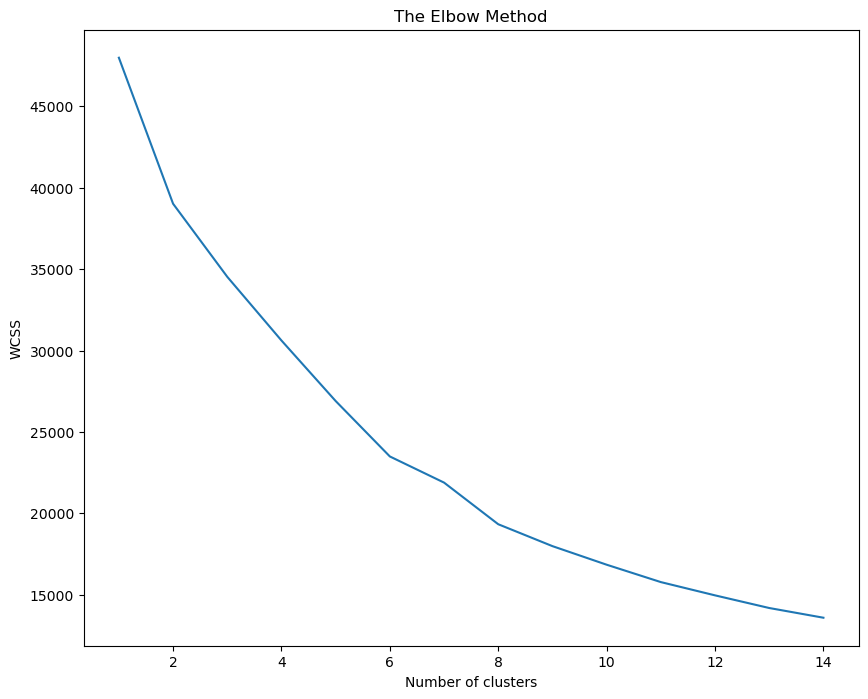

In [31]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As seen from the elbow graph, the slope changes at 2. However, since spltting the dataset into 2 groups would not be very beneficial, we further evaluate clusters for higher values of k.

## H Clustering
#### 4.1 - Euclidean distance, Ward

In [32]:
import scipy.cluster.hierarchy as sch

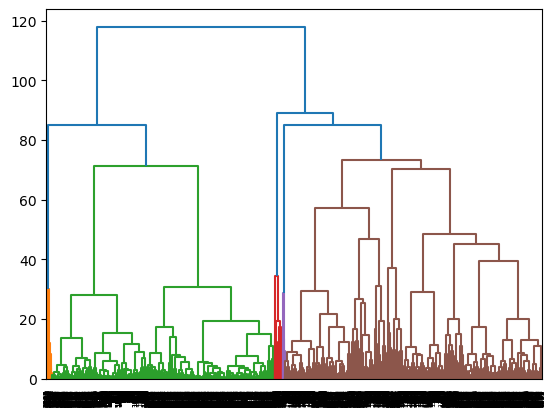

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='ward'))

In [34]:
X = df1_norm.values

## Agglomerative Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [37]:
h_cluster = model.fit(X)

c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
labels = model.labels_

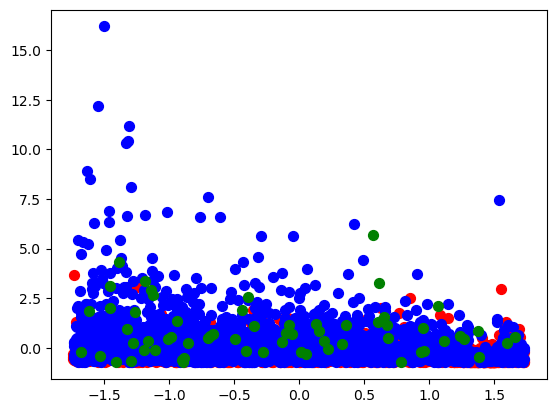

In [39]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

## K Means

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

c:\Users\91626\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
k_means

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [44]:
df1['k_cluster'] = k_cluster

In [45]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))

In [46]:
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8
2,2324.2,42286.3,92.3,1.2,1.0,1.0,4903.3,7.0,195.2,0.6,3554.7,0.2
3,1447.8,119771.2,163.5,3.6,1.0,1.0,39038.2,18.6,350.2,1.1,5144.0,0.6


In [47]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,164,164,164,164,164,164,164,164,164,164,164,164
2,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530,2530
3,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305


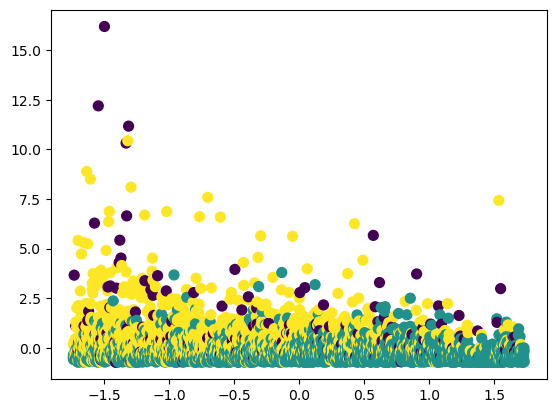

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')

From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.